In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy
from tqdm import tqdm

In [2]:
import GCRCatalogs
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)
# print('\n'.join(sorted(GCRCatalogs.get_available_catalogs())))

GCRCatalogs = 1.4.1 | GCR = 0.9.2


In [3]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')

In [4]:
dc2_table = Table(gc.get_quantities(['halo_mass','galaxy_id']))

In [5]:
result_table = Table(fits.open('./R11_result_table.fits')[1].data)

In [6]:
result_table

gal_id,R11
int64,float64
10565583202,0.2981948912467086
7938255098,0.3171492510460241
8066552175,0.31900016586901786
10568164066,0.29706920332304315
8878755991,0.25644837491795974
9688025776,0.28199588110785795
8937644291,0.19999169300785724
8940036839,0.41514662351638487
7064701891,0.28188984719479193


In [7]:
dc2_table

galaxy_id,halo_mass
int64,float64
9687500000,247261051312.67606
9687500001,54657675898.59155
9687500002,119726379988.7324
9687500003,70274166264.78874
9687500004,12069313567729.578
9687500005,12069313567729.578
9687500006,12069313567729.578
9687500007,111918134805.6338
9687500008,72876914659.15494


In [8]:
halo_mass_list = []
for gal_id in tqdm(result_table['gal_id']):
    halo_mass_list.append(dc2_table[dc2_table['galaxy_id'] == gal_id]['halo_mass'][0])
    
##TODO: search_sorted, 

100%|██████████| 1007/1007 [09:54<00:00,  1.69it/s]


In [ ]:
new_halo_mass_list = []


In [30]:
result_table['halo_mass'] = np.array(halo_mass_list).flatten()

In [31]:
first_quan = np.quantile(result_table['halo_mass'], 0.25)
second_quan = np.quantile(result_table['halo_mass'], 0.5)
third_quan = np.quantile(result_table['halo_mass'], 0.75)

first_mask = result_table['halo_mass'] < first_quan
second_mask = (result_table['halo_mass'] >= first_quan) & (result_table['halo_mass'] < second_quan)
third_mask = (result_table['halo_mass'] >= second_quan) & (result_table['halo_mass'] < third_quan)
forth_mask = result_table['halo_mass'] >= third_quan

mask_list = [first_mask, second_mask, third_mask, forth_mask]

In [32]:
result_table['halo_mass'].shape

(1007,)

In [33]:
mask_list[0]

array([False, False, False, ..., False, False, False])

In [34]:
halo_mass_vec = []
R11_vec = []

for mask in mask_list:
    print(np.sum(mask))
    halo_mass_vec.append(np.mean(result_table[mask]['halo_mass']))
    R11_vec.append(np.mean(result_table[mask]['R11']))

251
252
252
252


In [36]:
print(np.log10(halo_mass_vec))
print(R11_vec)

# compute bulge fraction vs halo mass, and hlr vs halo mass
# bootstrap or jackknife 
# jackknife randomly sort the array and jackknife the array 
# bootstrap randomly sample the array with replacement, it's slow, probably use jackknife
# 15% change 

[11.22717485 11.74679771 12.21011502 13.43522014]
[0.37630965605945593, 0.3537507579434308, 0.3248789423848004, 0.3283552670489138]


In [37]:
0.05 / 0.37

0.13513513513513514

(array([  2.,   6., 375., 387., 234.,   2.,   0.,   0.,   0.,   1.]),
 array([0.10039317, 0.17338077, 0.24636837, 0.31935597, 0.39234357,
        0.46533117, 0.53831877, 0.61130637, 0.68429397, 0.75728157,
        0.83026917]),
 <BarContainer object of 10 artists>)

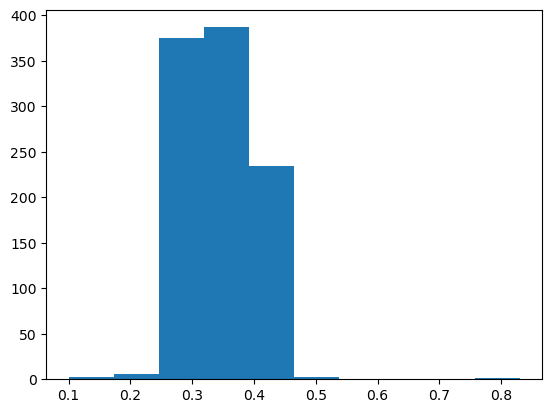

In [9]:
plt.hist(result_table['R11'])

In [ ]:
import GCRCatalogs

config_overwrite = dict(
    catalog_root_dir='/path/to/your/directory',
    check_file_list_complete=True,
    check_size=True,
)

cat = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image', config_overwrite)